In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **ANONYMOUS TRANSPORT COMPANY ANALYSIS 🚛**
First, I will provide a comprehensive overview of the variables included in our dataset because they are in Spanish:
* RECEPCIÓN CUENTAS (RECEIPT OF ACCOUNTS): It shows when the driver delivers his trip-related accounts, such as the signed remission guide, toll road expenses, invoices, and a summary of trip costs. These details are crucial for determining the driver's earnings for the trip they completed, allowing us to calculate the amount they will receive.

* FECHA (DATE): The scheduled date of the trip.
* HORA (HOUR): The scheduled time for the trip.
* CLIENTE (CUSTOMER) : It shows who requested the service.
* MARCA (AUTOMOBILE BRAND): The brand of the automobile used for the trip.
* MODELO (AUTOMOBILE MODEL): The model of the automobile used for the trip. 
* VIN (CHASIS): The number of the automobile chassis used for the trip.
* COLOR: The color of the automobile used for the trip.
* FAMILIA (AUTOMOBILE FAMILY): These can be heavy or light automobiles.
* ORIGEN (ORIGIN): The starting point of the trip.
* DESTINO (DESTINATION): The destination point of the trip. 
* PROVEEDOR (SUPPLIER): Who provides the transportion service in the trip.
* MOTIVO TRASLADO (REASON FOR THE TRIP): Why is the reason of the trip?
* OBSERVACIONES (OBSERVATIONS): The irregularities in the automobile. 
* LOCAL / REGIONAL: The trip was made in Lima or outside the region. 
* NUEVO / SEMINUEVO (NEW / USED): The autombile assigned to the trip is new or used. 
* VOLQUETE (TIPPER TRUCK): Was a Tipper truck used for the trip?
* STATUS (STATUS): The trip status
* CONDUCTOR (DRIVER): Who was the driver assigned to the trip?
* LICENCIA (DRIVER'S LICENSE): The license number of the driver
* PLACA (PLATE): LICENSE PLATE
* GUIA DE REMISIÓN (REFERRAL GUIDE): The referral guide number.
* FECHA DE INICIO (START DATE): When does the trip start?
* HORA LLEGADA CONDUCTOR (DRIVER ARRIVAL TIME): What time did the driver arrive at the meeting point to pick up the automobile?
* HORA DE INICIO DEL TRANSITO (TRANSIT START TIME): What time the driver started the trip.
* FECHA DE LLEGADA (ARRIVAL DATE): When the driver delivered the automobile in the settled destination.
* HORA DE LLEGADA DESTINO (ARRIVAL TIME): The time when the driver delivered the automobile in the final point
* EMBARQUE (SHIPMENT): The Shipment ID
* NRO. TRANSFERENCIA (TRANSFER NUMBER): The Transfer Number ID  
* POR RENDIR S/ (BUDGET): How much money did the driver receive for his expenses during the trip? For exm: 
* FECHA TRANSFERENCIA (TRANSFER DATE): When did the driver receive the money for his expenses?
* COMBUSTIBLE (FUEL): How much fuel has it been necessary to deliver during the trip?
* CINTA REFLECTIVA (REFLECTIVE TAPE): Was it necessary to put a reflective tape to the automobile?
* PARACHOQUE (BUMPER): Was it necessary to implement a bumper to the automobile?
* HORAS DE ESPERA (WAITING HOURS): How many hours did the driver wait at the meeting point to pick up the automobile?
* LAVADO (WASHING): Was it necessary to wash the automobile for the delivery?
* REVISIÓN TÉCNICA (TECHNICAL-MECHANICAL REVIEW): Was it necessary to do a technical-mechanical review for the automobile?
* OTROS (TRIP DETAILS): Additional information about the trip.
* COMENTARIOS (COMMENTS): Additional information about the trip.
* INCIDENTES DE TRANSITO / SINIESTROS (TRAFFIC INCIDENTS): The traffic incident(s) that occurred during the trip.

---

In [3]:
#Load the tranport company dataset
df_TransportCompany = pd.read_excel(
    io = '/home/carlosfol/Git_Projects/PSI_TRIPS/data/TRIPS_MADE.xlsx'
)

##### **Data Cleaning** 🗑️

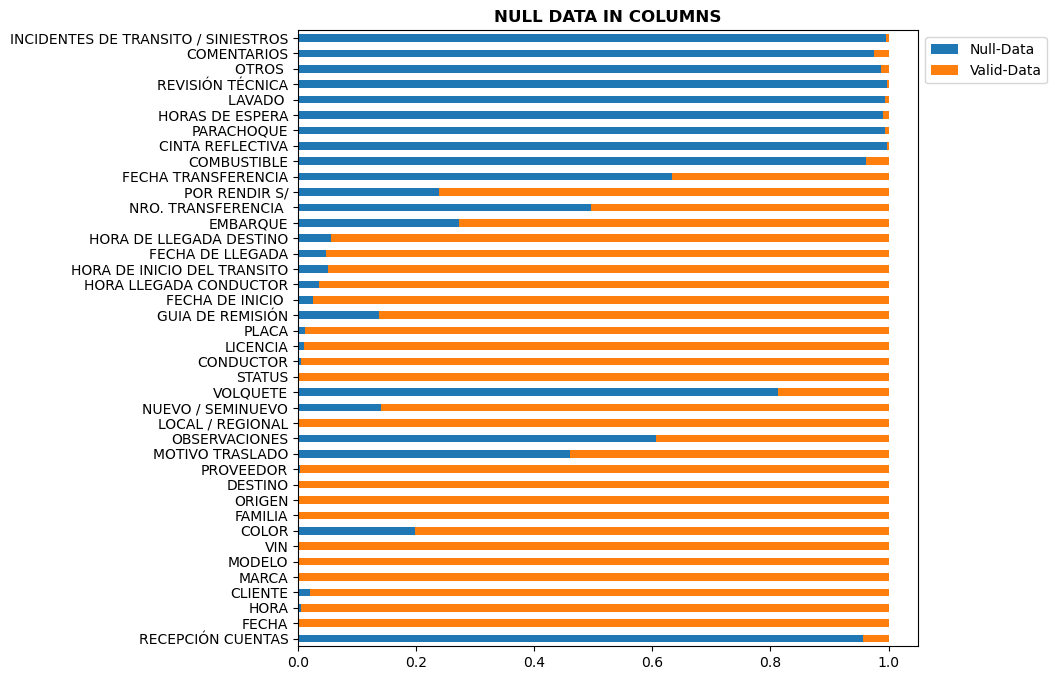

In [25]:
#Let's check the proportion of null data in the df
df_nulldata_columns = pd.DataFrame({
    'Null-Data': df_TransportCompany.isnull().sum(),
    'Valid-Data': df_TransportCompany.notnull().sum()
})
df_nulldata_columns = df_nulldata_columns.div(df_nulldata_columns.sum(axis = 1), 
                                              axis = 0)
#Plot the results
df_nulldata_columns.plot(
    kind = 'barh',
    stacked = True,
    figsize = (8, 8),
)
plt.title('NULL DATA IN COLUMNS', 
          fontdict = {'weight': 'bold'})
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [33]:
total_columns = len( df_TransportCompany.columns )
#Which columns have a high pct of null data (50% <=) ?
more_than_50 = df_nulldata_columns['Null-Data'] >= 0.5
pct = len( df_nulldata_columns[more_than_50].index ) / total_columns
print(f'{pct * 100}% of the columns have a large amount of null data')

32.5% of the columns have a high amount of null data


It's normal to see some columns with a large amount of null data, because there were trips where it was not neccesary to put a reflective tape or a bumper, refuel the car, do the Technical-Mechanical Review, etc. So we have to fill these null data with Missing values.

Another point to mention is that we can see at a glance that there are no trips with all null data in all columns. But, let's check if what I say is true.